In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_excel('glass.xlsx',sheet_name='glass')

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
df.shape

(214, 10)

In [19]:
df.duplicated().sum()

1

In [21]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

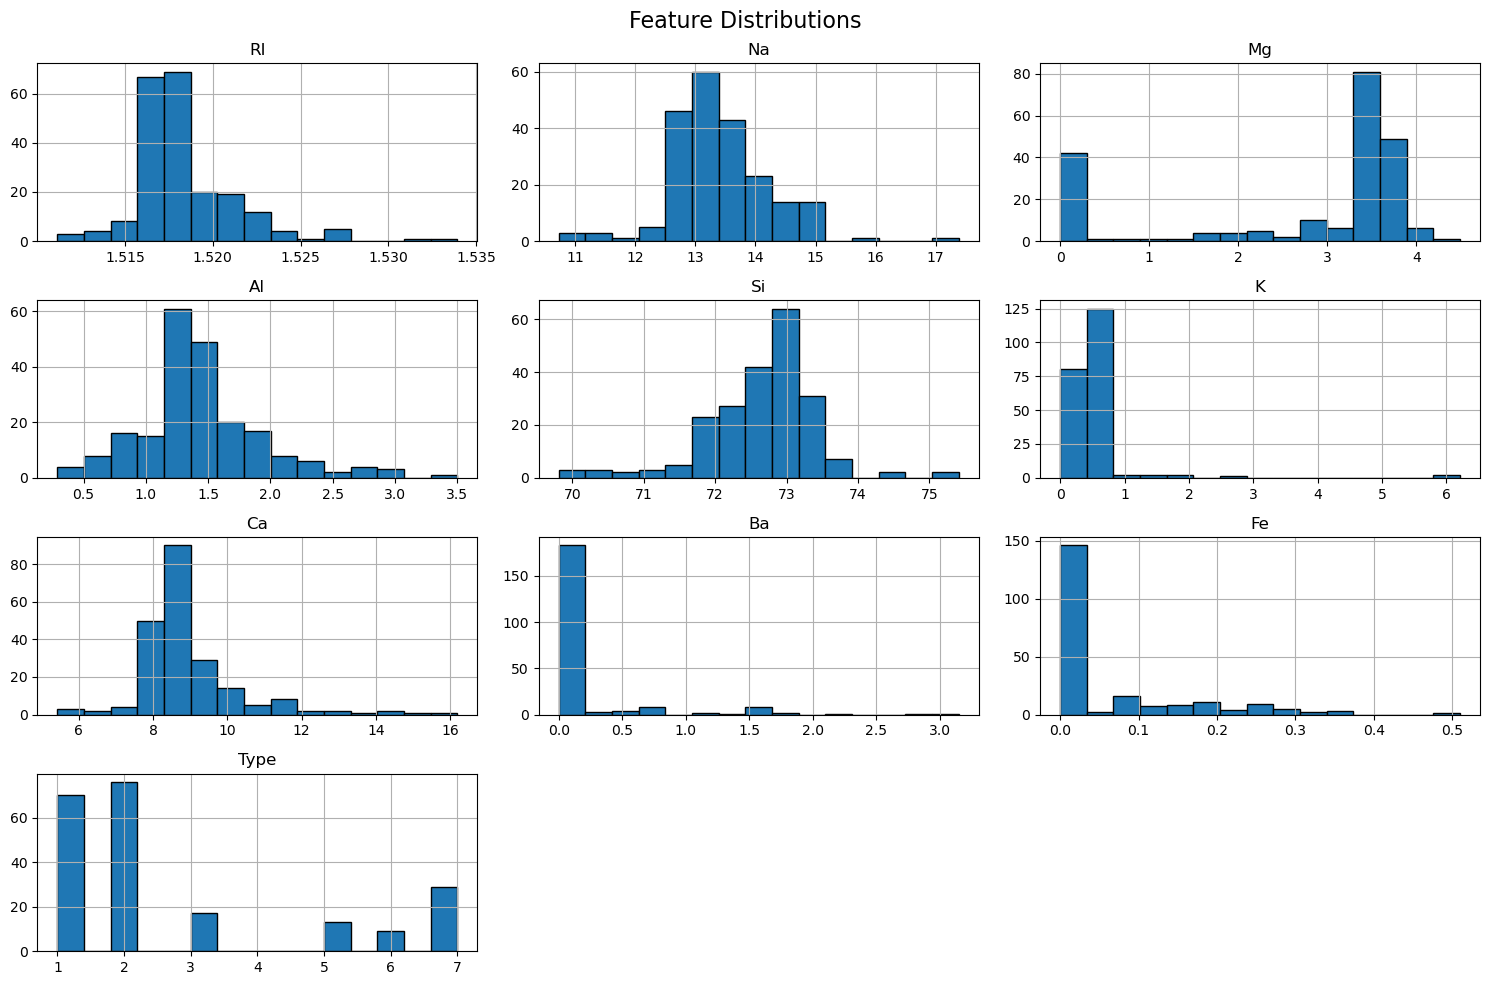

In [39]:
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


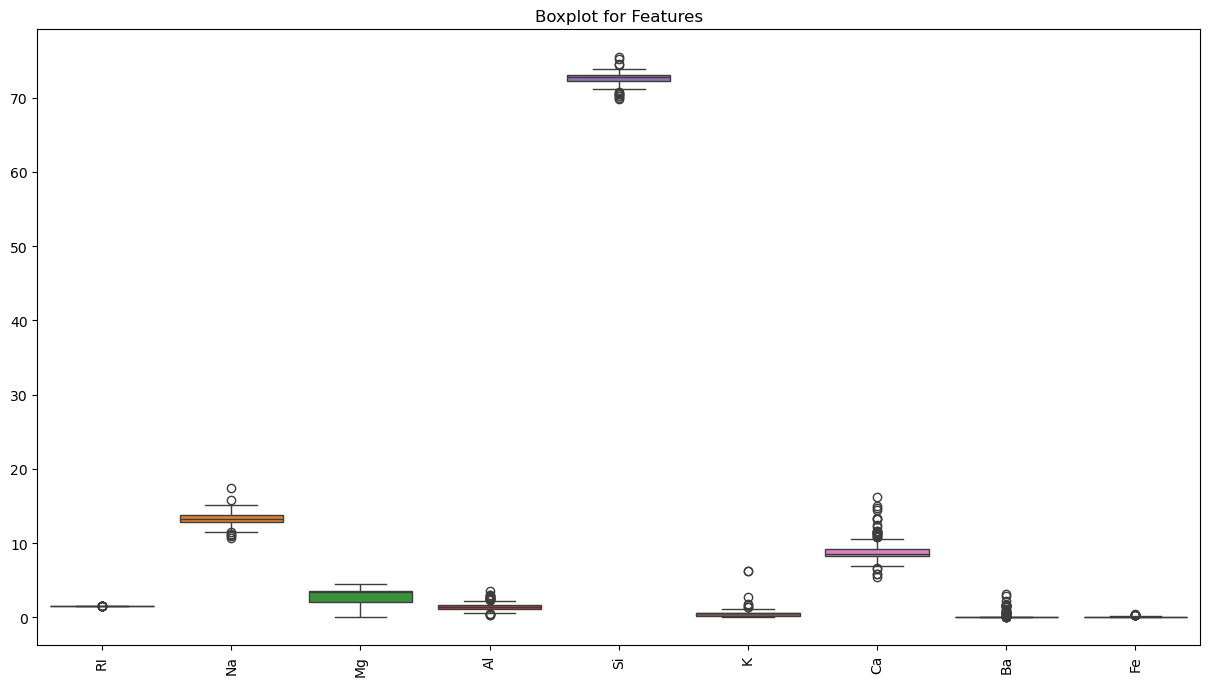

In [35]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns='Type'))  # assuming 'Type' is the target
plt.xticks(rotation=90)
plt.title("Boxplot for Features")
plt.show()

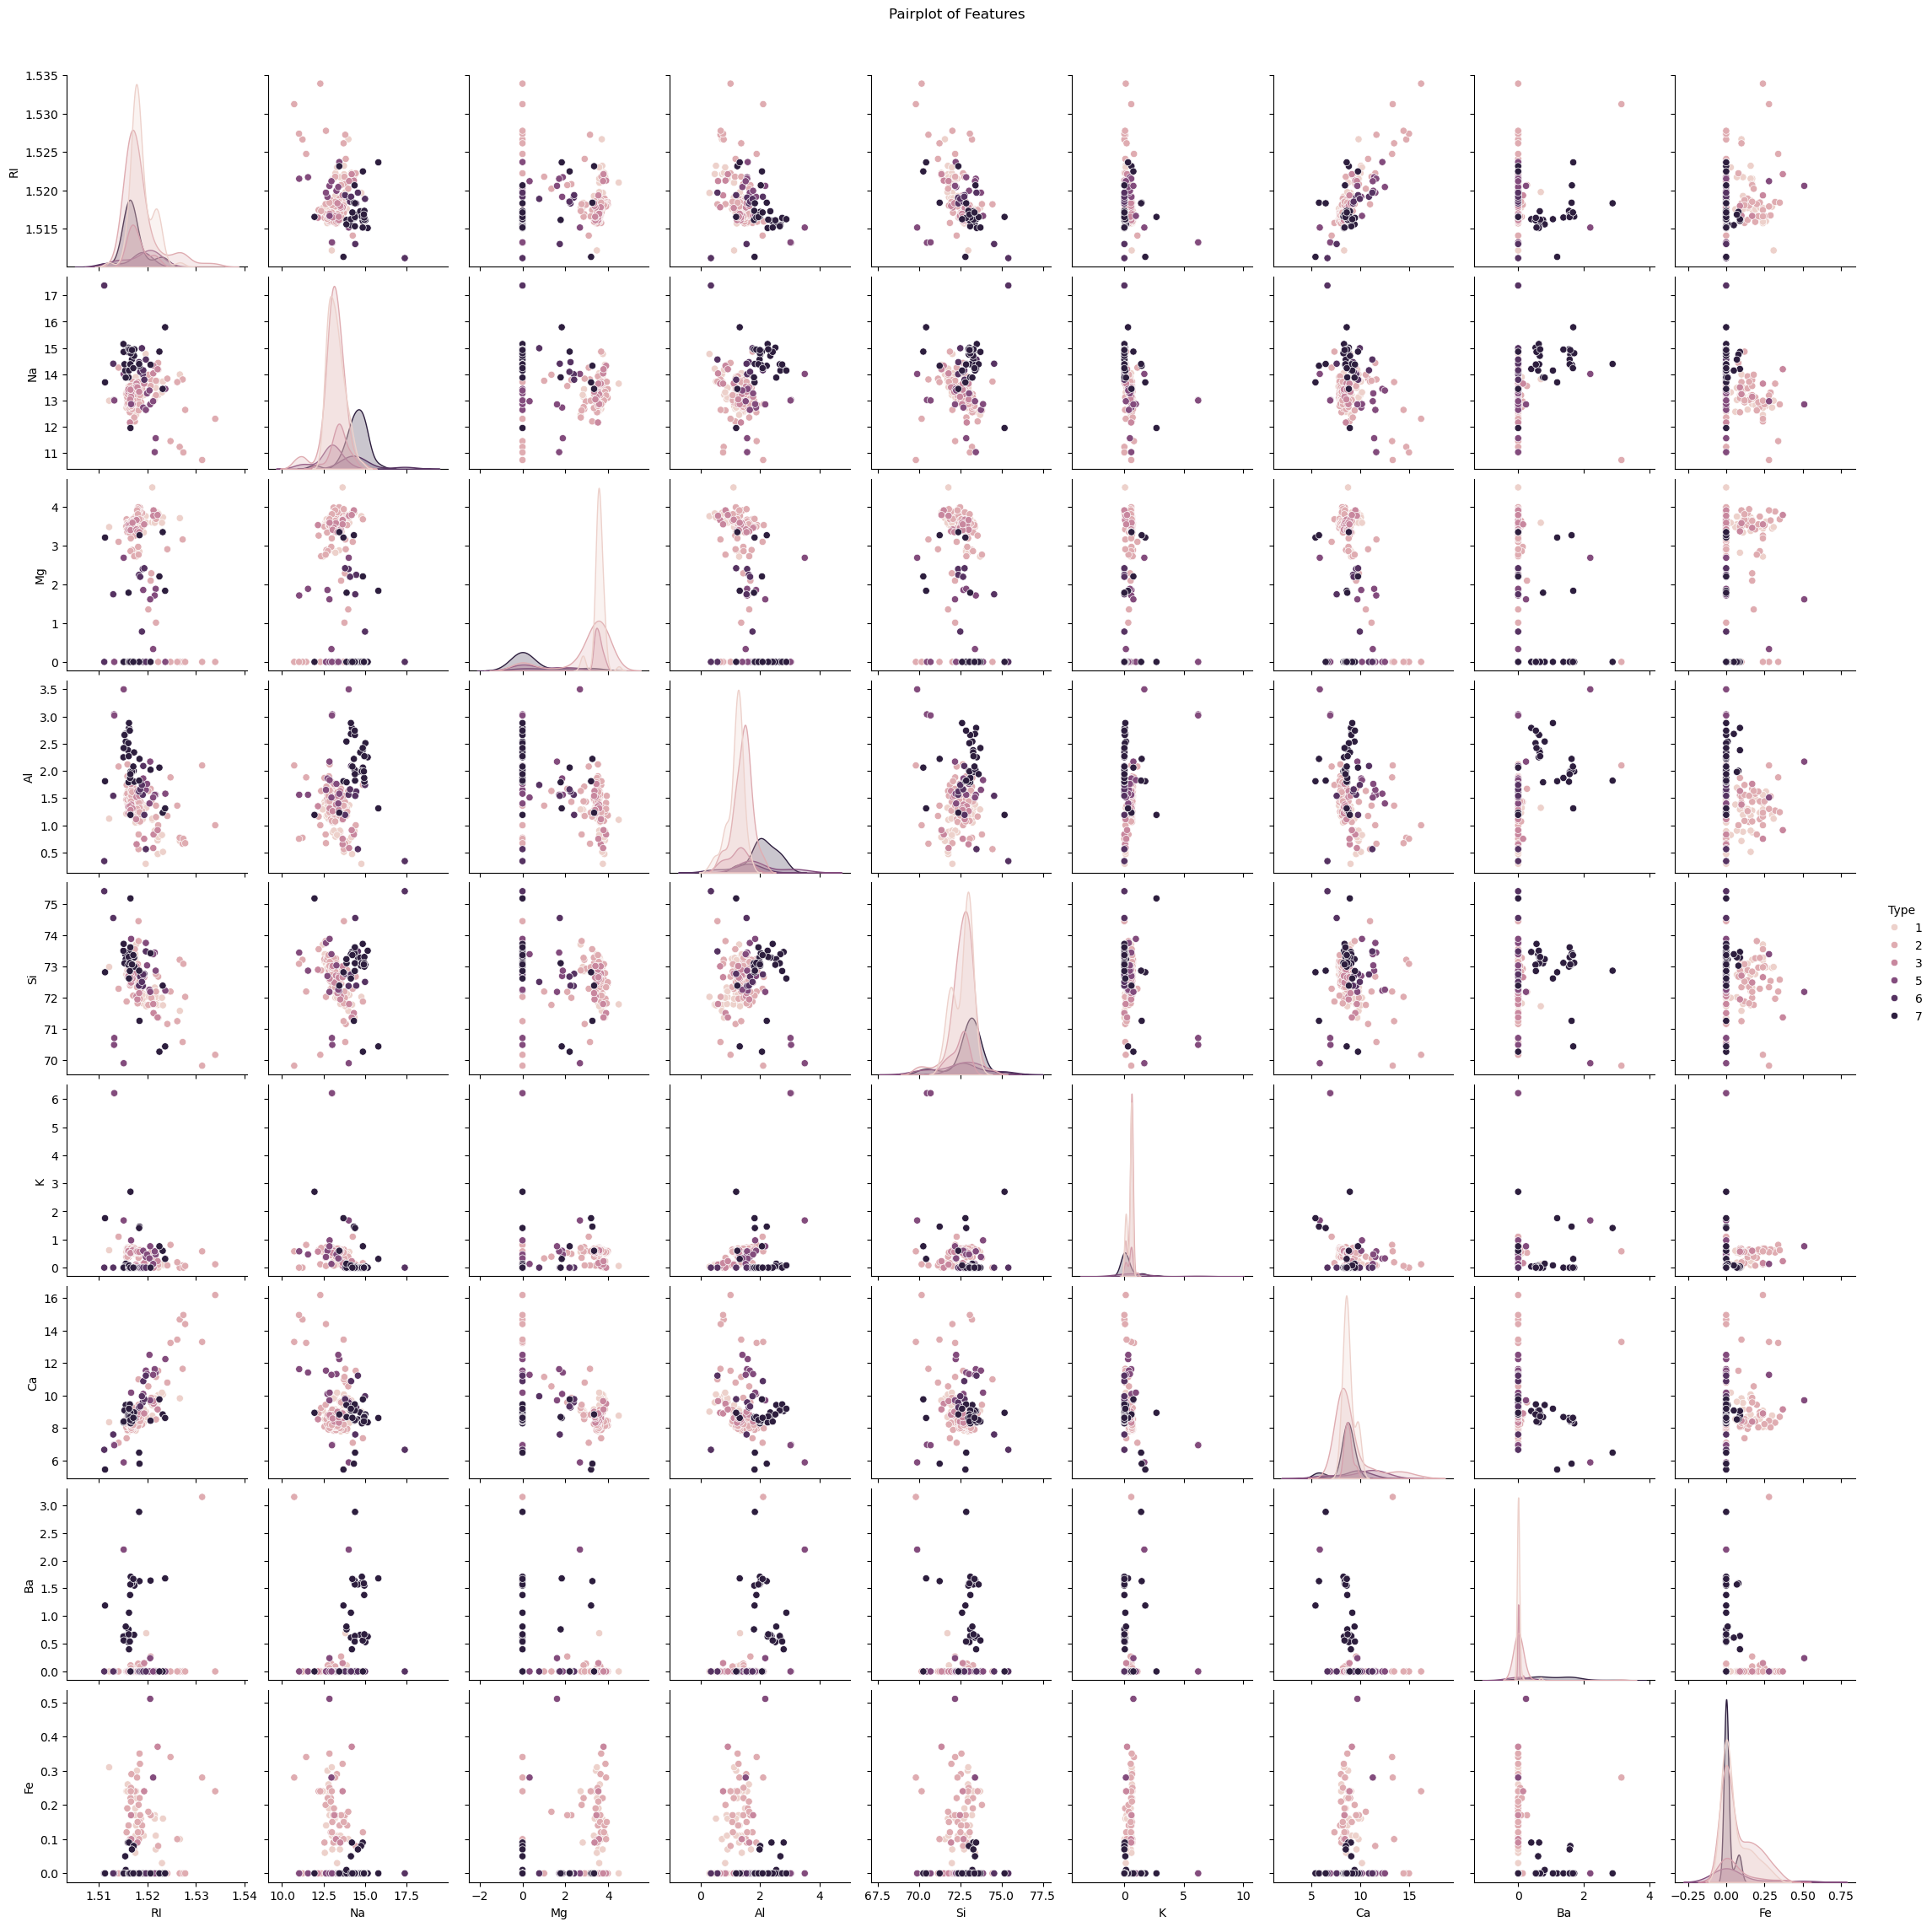

In [43]:
sns.pairplot(df, hue='Type', diag_kind='kde')  
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

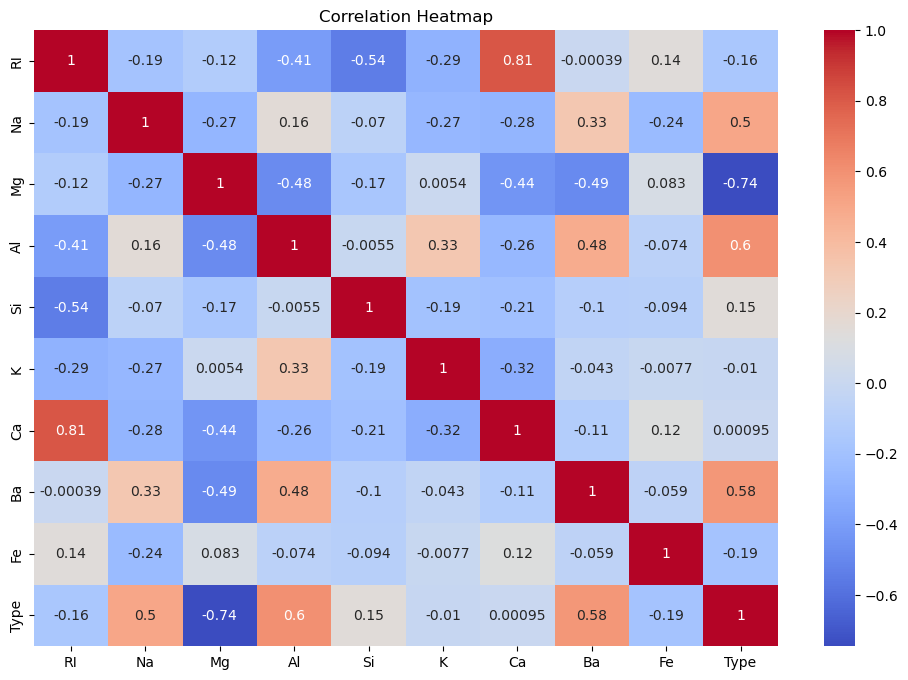

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [51]:
X = df.drop(columns='Type')
y = df['Type']

In [53]:
def Outcap(df,columns):
    Q1=df[columns].quantile(0.25)
    Q3=df[columns].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[columns]=df[columns].apply(lambda x:lower if x<lower else upper if x>upper else x)
for col in X:
    Outcap(df,col)

In [59]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers
for col in X:
    print(f"Number of Outlier in {col}:{len(detect_outliers_iqr(df,col))}")

Number of Outlier in RI:0
Number of Outlier in Na:0
Number of Outlier in Mg:0
Number of Outlier in Al:0
Number of Outlier in Si:0
Number of Outlier in K:0
Number of Outlier in Ca:0
Number of Outlier in Ba:0
Number of Outlier in Fe:0


In [61]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf.predict(X_test)

In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92


Confusion Matrix:
 [[13  1  1  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  0 13  0  0  0]
 [ 0  0  0 15  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  1  0 14]]


In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [79]:
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [81]:
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.81      0.87      0.84        15
           3       0.93      0.87      0.90        15
           5       1.00      0.94      0.97        16
           6       0.89      1.00      0.94        16
           7       1.00      0.93      0.97        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



EDA & Visualization

Preprocessing (missing values, scaling, outlier removal, class balancing with SMOTE)

Random Forest implementation

Compared Bagging (Random Forest) vs Boosting (AdaBoost & GradientBoosting)